In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/MineriaDeDatos/TP1/Crop_recommendation.csv')


In [5]:
#data = pd.read_csv('/content/Crop_recommendation.csv')

# Trabajo Práctico 1
## Materia: Minería de Datos
Este es el primer trabajo práctico de la materia Minería de Datos de la carrera TUIA. Consiste en la implementación de alguna de las técnicas de reducción de dimensiones y clústering de la materia.
### Integrantes
- Enzo Ferrari
- Micaela Pozzo

# Dataset : Atributos de la cosecha
Este dataset cuenta con registros acerca de mediciones realizadas sobre plantaciones.
## Variables
- N: Medición de nitrógeno.
- P: Medición de fósforo.
- K: Medición de potásio.
- Temperature: The average soil temperatures for bioactivity range from 50 to 75F
- Ph: A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7)
- label: Types of Crop

## Objetivo
El objetivo del trabajo es usar las técnicas aprendidas para la selección y/o reducción de las variables.

In [6]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [13]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
# Análisis exploratorio
data.info()
# No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


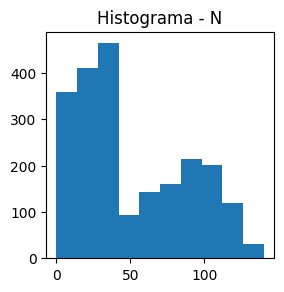

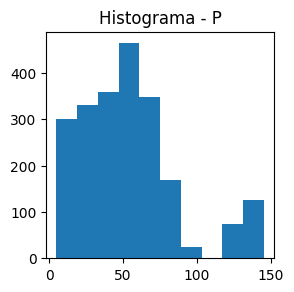

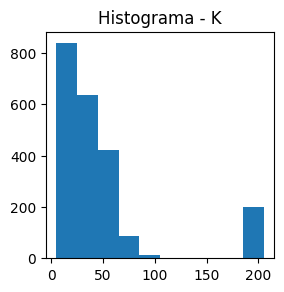

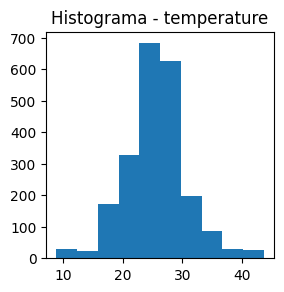

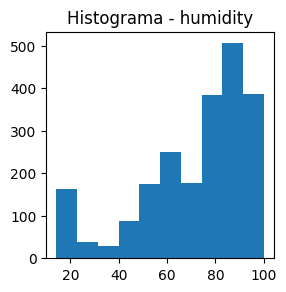

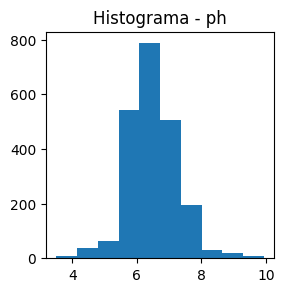

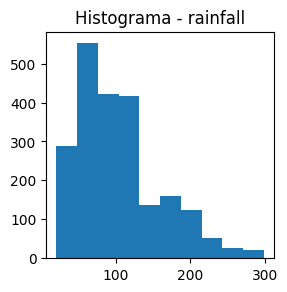

In [10]:
# Analizar distribución de cada variable
# No hay valores atípicos

subplot_number = 331
for column in list(data.columns):
  if column == 'label': continue
  plt.figure(figsize=(10,10))
  plt.subplot(subplot_number)
  plt.hist(data[column])
  plt.title(f'Histograma - {str(column)}')
  subplot_number += 1
#plt.figure(figsize=(10,10))
plt.show()

#Estandarizacion
En los métodos para reducir variables, para que una variable no tenga más peso que las demás, resulta idóneo que las variables no difieran en sus desvíos. Además, como las distribuciones son aproximadamente normales (al menos la mayoría de estas), podemos usar estandarización z-score.

In [11]:
data_sub = data.drop(['label'], axis=1)
data_std = (data_sub-data_sub.mean())/data_sub.std()

## Visualización de boxplots
Veamos los boxplots para ver como están distribuídos los outliers

<Figure size 800x800 with 0 Axes>

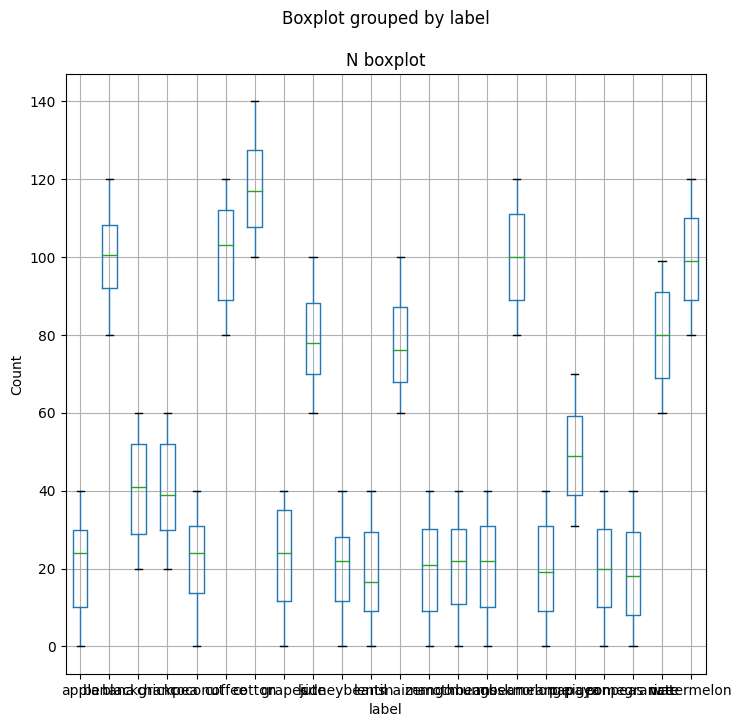

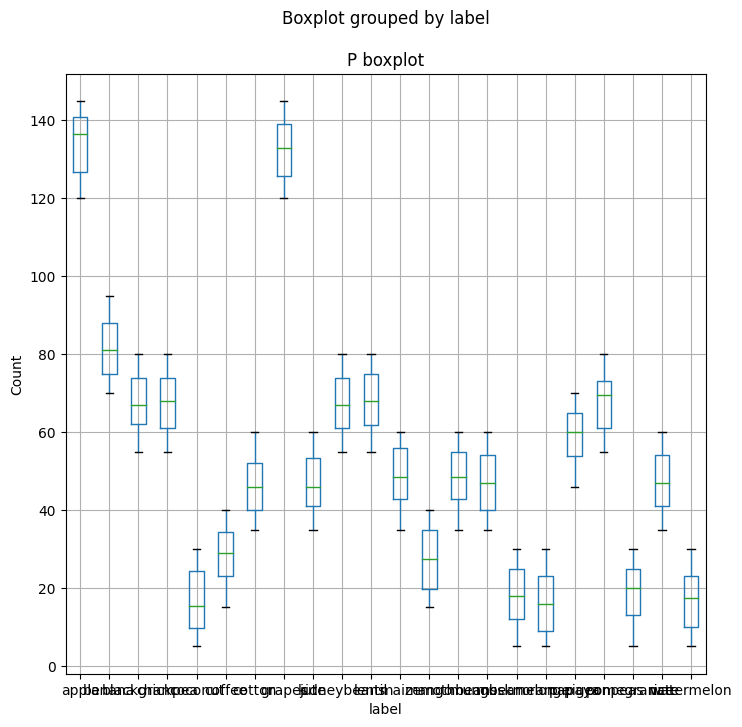

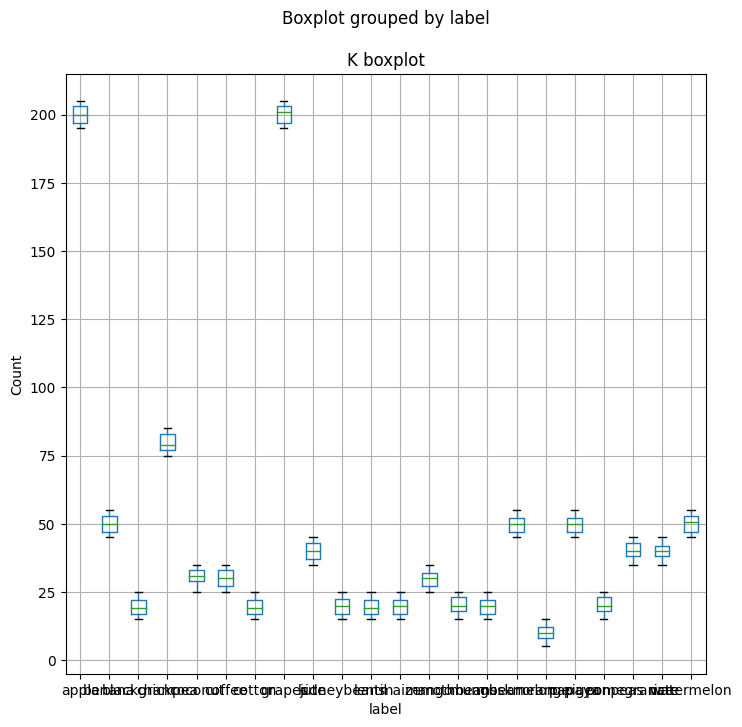

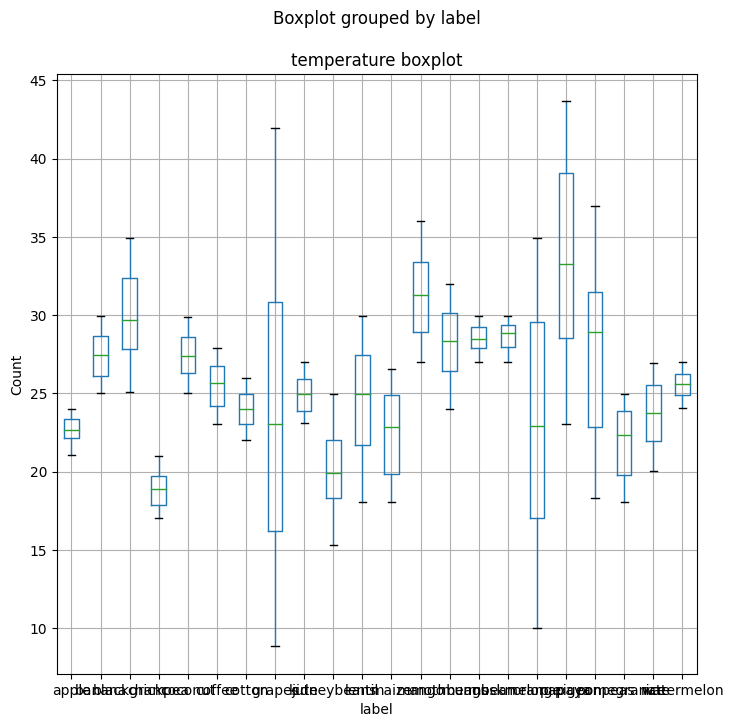

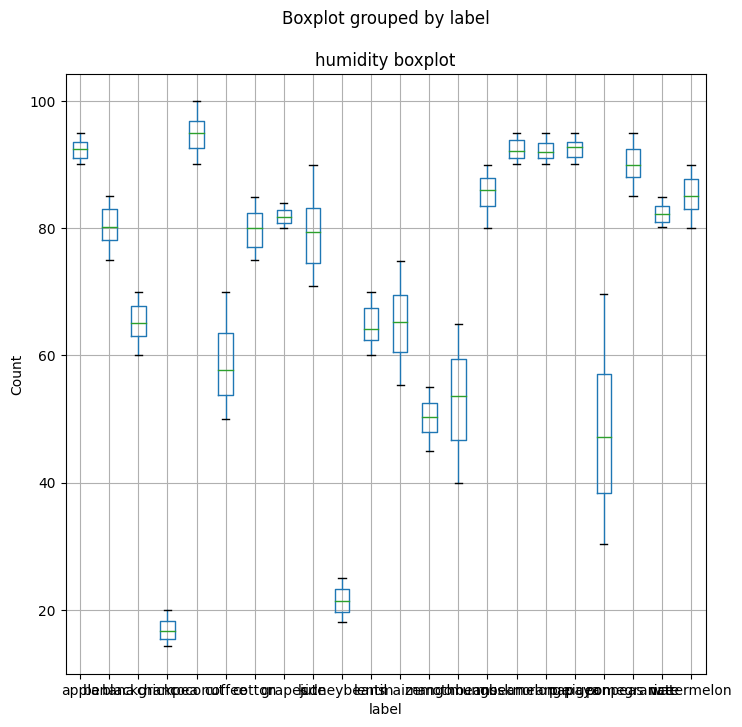

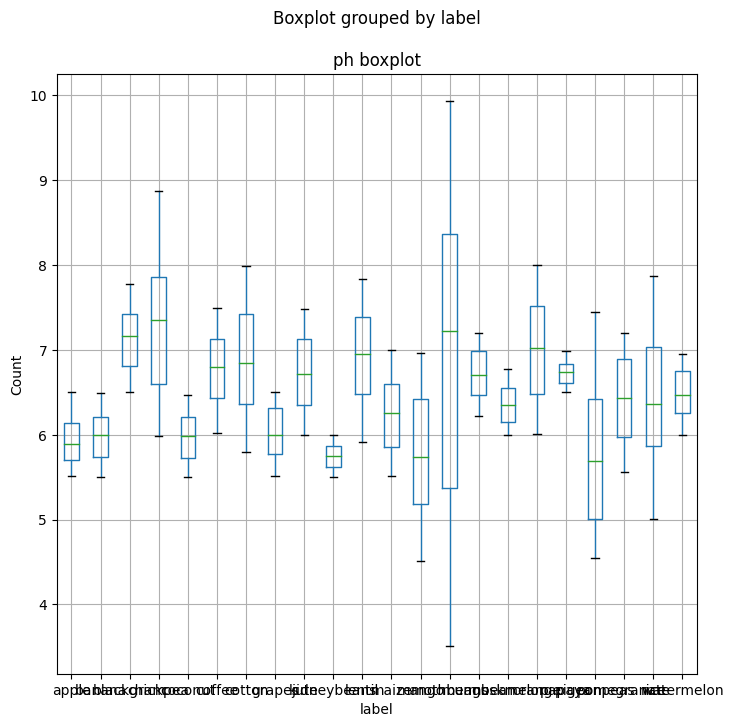

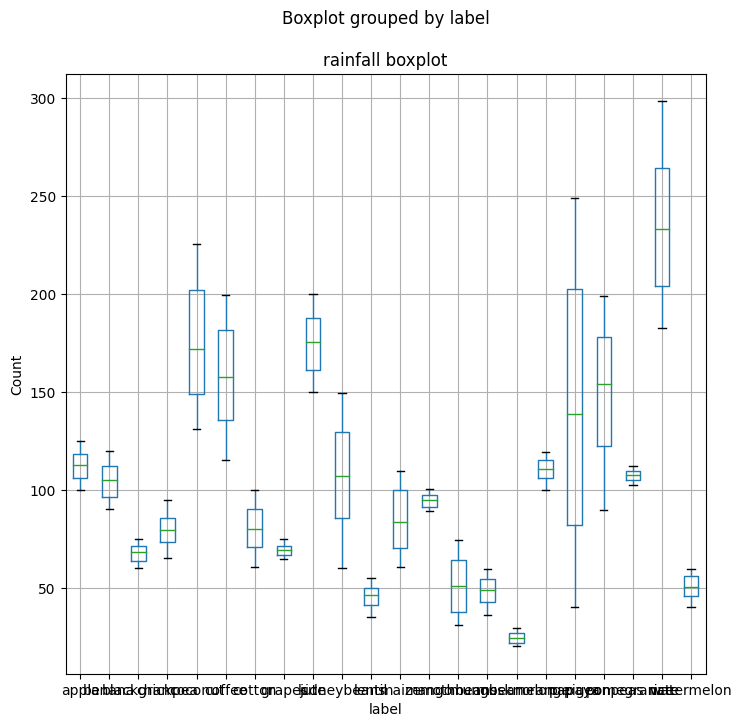

In [17]:
# Visualizar boxplots según localidad
plt.figure(figsize=(8,8))
x_size = 10
y_size = 5
for n_col, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  fig, axes = plt.subplots(figsize=(8,8))
  data.boxplot(column=column, by='label', ax=axes)
  plt.ylabel('Count')
  plt.title(f'{column} boxplot')
  plt.show()

## Outliers
Notamos que no contamos con la presencia de outliers

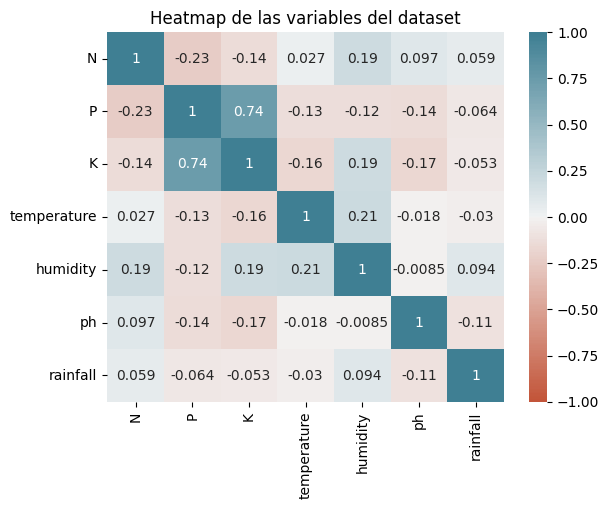

In [18]:
# Buscar correlación entre las variables:
data_corr = data.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    data_corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    annot=True
)
plt.title('Heatmap de las variables del dataset')
plt.show()


Podemos observar que no existe una fuerte correlación entre las variables, solo entre P y K.

# PCA
Debemos aplicar reducción de variables al dataset.

Luego tenemos que, según los criterios vistos, elegir cuantas componentes principales tomamos.

In [19]:
# Obtener todas las componentes principales buscando los autovalores y autovectores de la matriz de correlación
# Creamos la instancia PCA con 7 componentes, es decir, no contamos las variables categóricas.
pca = PCA(n_components=data_sub.shape[1])

# Buscar las componentes principales (ahora sobre el dataset estandarizado)
pca_features = pca.fit_transform(data_std)

# Lista de componentes principales
lista_pca = []
lista_variables = []
for i in range(1,data_sub.shape[1]+1): lista_pca.append(f'PC{i}') ; lista_variables.append(f'X{i}')

# Dataframe con las componentes principales
data_pca = pd.DataFrame(
    data = pca_features,
    columns = lista_pca,
)

# Agregar columnas no categóricas
data_pca['label'] = data['label']
data_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


# Autovectores
Los autovectores buscados son las componentes principales, que son combinación lineal de las variables originales

Busquemos las componentes de las PC

In [20]:
data_autovectores = pd.DataFrame(pca.components_, columns=lista_pca, index=lista_variables)
data_autovectores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


In [21]:
# Creamos función para crear array acumulado
data_autovalores = pd.DataFrame({'Autovalores': pca.explained_variance_,
                                 '% Varianza explicada': pca.explained_variance_ratio_,
                                 '% Varianza acumulada': np.cumsum(pca.explained_variance_ratio_)})
data_autovalores

,Autovalores,% Varianza explicada,% Varianza acumulada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


# Graficar el porcentaje de la varianza explicada
Para decidir cuántas componentes principales elegimos, debemos analizar según distintos criterios

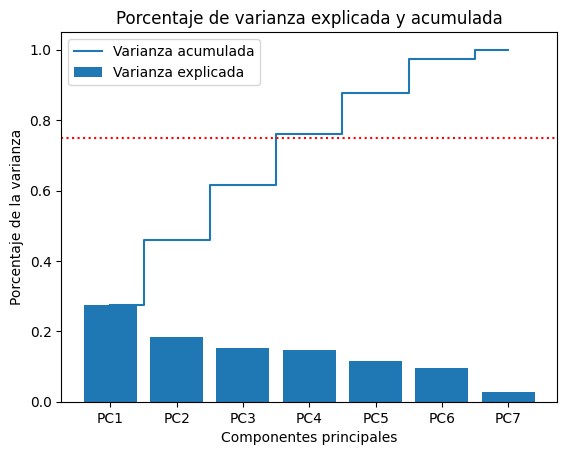

In [22]:
plt.bar(lista_pca, pca.explained_variance_ratio_,
        label='Varianza explicada')
plt.step(lista_pca, np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         label='Varianza acumulada')
plt.axhline(0.75,color='r', linestyle=':')
plt.title('Porcentaje de varianza explicada y acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de la varianza')
plt.legend()
plt.show()

## Scree plot
Antes de concluir la selección de componentes principales, veamos el scree plot para ver donde se produce el 'quiebre'

Text(0.5, 1.0, 'Scree plot')

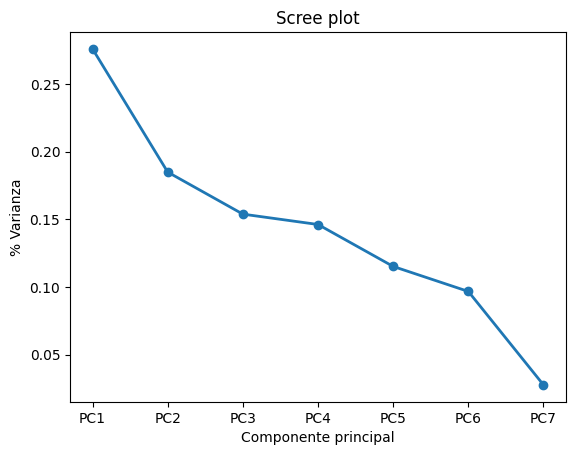

In [23]:
plt.plot(lista_pca, pca.explained_variance_ratio_, 'o-', linewidth='2')
plt.ylabel('% Varianza')
plt.xlabel('Componente principal')
plt.title('Scree plot')

## Elección de componentes principales
### Criterios:
- Varianza acumulada 75%~80%.
- Autovalores > 1.
- Gráfico del codo.

### Conclusiones
Observamos que las primeras 4 PC tienen autovalores mayores a 1 y además, estas son las primeras en sumar arriba de 0.75 para la varianza acumulada, por lo que se decide elegir 4 componentes principales.

De esta manera, logramos capturar una gran cantidad de explicación de la variabilidad del dataset en 4 componentes.

## Matriz de correlación


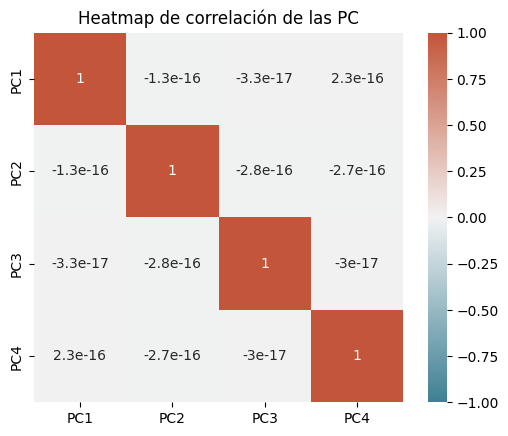

In [24]:
corr = data_pca[['PC1','PC2','PC3','PC4']].corr()

ax = sns.heatmap(
    corr,
    vmin = -1, vmax=1, center=0,
    cmap=sns.diverging_palette(220,20,as_cmap=True),
    square = True,
    annot = True
)
plt.title('Heatmap de correlación de las PC')
plt.show()

## Visualización de las componentes principales
Debido a la elección de 4 PC, no es tan fácil visualizarlas. Sin embargo, podemos usar 2 o 3 de las 4 dimensiones para hacer scatter plots.


In [25]:
# 2 dimensiones
fig = px.scatter(pca_features,
                 x=0, y=1,
                 color = data_pca['label'],
                 labels={'color':'class'})
fig.update_xaxes(title_text= 'PC1')
fig.update_yaxes(title_text='PC2')

fig.update_layout(title='2 dimensiones')

fig.show()

# 3 dimensiones
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
                 color=data_pca['label'],
                 labels={'color':'label'})
fig.update_layout(title='3 dimensiones')
fig.show()

Podemos observar la presencia de clusters en la visualización en 3 dimensiones

PCA es un método de reducción de dimensiones *lineal*, por lo que puede no capturar la naturaleza de los datos en el caso de que estos se encuentren en un hiperplano. Veamos los otros métodos

# ISOMAP
Para poder agregar interpretabilidad a los datos, se puede implementar el método ISOMAP para poder captar la distribución real de los datos.

El método busca dentro del espacio un espacio embebido usando las vecindades de los puntos de coordenadas. Este método es útil para parametrizar hiperplanos dentro de nuestro espacio.

Debemos manipular las variables para que ajusten mejor nuestros datos. Las variables a manipular son:
- n_neighbours: Determina cuántos vecinos tendrá cada nodo en el grafo de vecindades.
- n_components: Dimensiones del espacio creado.

n_neighbours será ajustado experimentalmente.

Isomap automáticamente busca la representación de más baja dimensionalidad que mejor preserva las distancias. Para visualización, usamos 3 componentes.

In [26]:
# Crear instancia isomap
isomap = Isomap(n_neighbors=7,n_components=3)

# Crear el gráfico de vecindades y calcular distancias geodésicas
isomap.fit(data_std)

# Transformar los datos en la representación de menor dimensionalidad
isomap_proyections = isomap.transform(data_std)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

In [27]:
# Graficar ISOMAP
fig = px.scatter_3d(isomap_proyections,
                   x=0, y=1,z=2,
                   color=data_pca['label'],
                   labels={'color':'label'}
                   )
fig.show()

## Conclusiones del ISOMAP
Como se ha mencionado anteriormente, ISOMAP es un método útil para el caso de desdoblamiento de un hiperplano. Visualizando mediante PCA, vemos que el resultado generado no tiene una forma clara como para deducir que fue desdoblada de un espacio de mayor dimensionalidad. Este método no sirve para visualizar la distribución de datos.

Veamos otros métodos

# t-SNE
Técnica de visualización de datos en alta dimensión.

El proceso de este método consiste en:
- Tomamos los puntos en alta dimensión.
- Usamos la distribución gaussiana para calcular similaridad entre puntos en alta dimensión.
- Pasamos a la dimensión reducida (donde visualizamos).
- Distribuímos aleatoriamente los puntos en la dimensión reducida.
- En la dimensión reducida, usamos t-student para definir similaridad en la nueva dimensión.
- Usando la divergencia de Kullback-Liebler, que tiene en cuenta la similaridad en alta dimensión (Gaussiana) y la similaridad en baja dimension (t-student), hacemos descenso por el gradiente hasta llegar a un mínimo local.

### Parámetros
- Perplejidad: Número de vecinos objetivo para cada punto en la gaussiana.
- Componentes: Dimensiones del espacio reducido

In [28]:
# Inicializamos instancia TSNE
perplexity_tsne = 20
tsne2d = TSNE(n_components = 2, random_state = 0, perplexity=perplexity_tsne)
tsne3d = TSNE(n_components = 3, random_state = 0, perplexity=perplexity_tsne)

# Ajustar el espacio con los puntos de nuestro dataset
proyection_tsne2d = tsne2d.fit_transform(data_std)
proyection_tsne3d = tsne3d.fit_transform(data_std)

#TARDA BOCHA

In [29]:
# Visualizar
fig = px.scatter(proyection_tsne2d,
                    x=0,y=1,
                    color = data_pca['label'],
                    labels={'color':'label'})

fig.show()
fig = px.scatter_3d(proyection_tsne3d,
                    x=0,y=1,z=2,
                    color = data_pca['label'],
                    labels={'color':'label'})
fig.show()

# Conclusión
Incluímos ambas visualizaciones 2d y 3d para tener una vista general.

Al intentar con una perplejidad de 5 no se puede deducir mucho de la visualización, como el dataset parece ser bastante denso, se decide aumentar la perplejidad.

Al experimentar con valores de perplejidad más grandes, podemos observar cómo los datos parecen estar separados en anillos según su clase, o incluso si se usa una perplejidad alta se puede observar como se amontonan los datos.

Tanto en la vista 2d como 3d se pueden observar que cada clase tiene un cluster propio, excepto por la clase 'mothbean', que parece filtrarse entre otras.

Puede visualizarse un claro agrupamiento de los datos que coincide con las categorías, por lo que puede decirse que este método sirve para este conjunto de datos.




# Agrupamiento
Encontrar patrones en los datos
## K-means
Comienza con k centros seleccionados al azar y se recalculan hasta llegar a una solución.
### Parámetros
- k: Cantidad de clusters a separar

### Criterios
Para decidir cuál es la mejor cantidad de clusters, se observa la inercia, es decir, la suma de las distancia dentro de los clusters.
Se determina la mejor cantidad usando el método del codo (Scree Plot)

In [30]:
from sklearn.cluster import KMeans
inercia = []
for k in range(1,16):
  kmeans = KMeans(n_clusters=k,random_state=0) # Inicializamos la instancia
  kmeans.fit(data_std)
  inercia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

([<matplotlib.axis.XTick at 0x7b57c0d31990>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

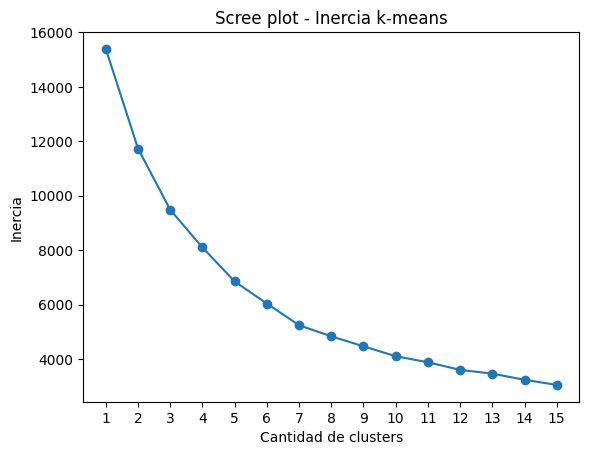

In [31]:
plt.plot(range(1,16),inercia,marker='o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercia')
plt.title('Scree plot - Inercia k-means')
plt.xticks(range(1,16))

##Conclusión
Es muy dificil a simple vista decidir en dónde se produce el quiebre, tomemos un número y luego fundemos mejor nuestra decisión con GAP

In [32]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(data_std)
# El array labels_ nos dice a qué cluster pertenece cada observación
data['Cluster KMeans'] = data_pca['Cluster KMeans'] = kmeans.labels_

data_pca['Cluster KMeans'] = data_pca['Cluster KMeans'].apply(str)

data.tail()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,11
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,11
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,11


In [33]:
# Interpretación
data.groupby('Cluster KMeans').mean()

<ipython-input-33-8356bb2fd391>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,N,P,K,temperature,humidity,ph,rainfall
Cluster KMeans,,,,,,,
0,99.870000,17.360000,50.150000,27.127416,88.751589,6.427292,37.738086
1,20.321168,67.854015,22.343066,20.202286,27.497849,5.720690,116.763900
2,21.774390,133.701220,199.987805,20.708749,88.196923,5.986700,95.802182
3,81.734767,43.627240,38.139785,24.679891,76.905167,6.642332,198.165072
4,27.360231,59.112392,21.484150,27.831115,71.275143,6.892809,57.780687
5,45.457143,52.371429,42.042857,37.391764,90.546601,6.863335,149.365767
6,18.575000,17.662500,26.725000,20.469996,91.053728,6.752129,108.710193
7,23.509091,51.690909,20.127273,28.922127,55.964667,8.426248,55.889389
8,20.333333,43.245902,24.972678,30.641401,49.498835,5.467152,100.067212


In [34]:
kmeans.cluster_centers_
# Centro de cada cluster

array([[ 1.33590855, -1.09145866,  0.03950624,  0.29842963,  0.7756897 ,
        -0.05451109, -1.19591516],
       [-0.81887415,  0.43931786, -0.50951786, -1.06916003, -1.97557952,
        -0.96750637,  0.24200572],
       [-0.77950992,  2.43554168,  2.99792533, -0.96914258,  0.75077639,
        -0.6237967 , -0.13940499],
       [ 0.84466958, -0.29514102, -0.19762517, -0.18491307,  0.24359654,
         0.22334069,  1.72314762],
       [-0.62820321,  0.17430683, -0.52647642,  0.43739758, -0.00928124,
         0.54698062, -0.83122831],
       [-0.13800226, -0.03005221, -0.12056235,  2.32545508,  0.85631436,
         0.50889757,  0.83521575],
       [-0.86617355, -1.08228807, -0.42300032, -1.01629213,  0.87909247,
         0.36520909,  0.09546382],
       [-0.73252113, -0.05068284, -0.55326679,  0.6528529 , -0.69696564,
         2.5283273 , -0.86564157],
       [-0.81854462, -0.30670168, -0.45759843,  0.99237886, -0.98738458,
        -1.2951019 , -0.06180028],
       [-0.27470272,  0.4434

# Visualización
Para poder ver que tan bien separo nuestros datos k-means, podemos volver a visualizar mediante T-SNE, ya que vimos que separó bien los clusters en relación de los labels del dataset.

Otra manera es seleccionar 2 o 3 variables del dataset y visualizarlas usando un gráfico 3D. La manera más razonable de visualizarlas es seleccionando N, K y P por un lado, ya que sería lógico que cada las concentraciónes de cada cluster se encuentren delimitadas; y seleccionando 3 entre rainfall, ph, humidity y temperature, pues podría observarse alguna relación entre ellas.

In [35]:
# Visualizar usando T-sne
fig = px.scatter(proyection_tsne2d,
                    x=0,y=1,
                    color = data_pca['Cluster KMeans'],
                    labels={'color':'Cluster KMeans'})

fig.show()
fig = px.scatter_3d(proyection_tsne3d,
                    x=0,y=1,z=2,
                    color = data_pca['Cluster KMeans'],
                    labels={'color':'Cluster KMeans'})
fig.show()

In [36]:
fig = px.scatter_3d(data_std,
                    x='N',y='P',z='K',
                    color = data_pca['Cluster KMeans'],
                    labels={'color':'Cluster KMeans'})

fig.show()
fig = px.scatter_3d(data_std,
                    x='ph',y='temperature',z='humidity',
                    color = data_pca['Cluster KMeans'],
                    labels={'color':'Cluster KMeans'})
fig.show()

# Conclusión
Hemos visto que no hemos obtenido un buen resultado del método k-means.



Sin importar de la cantidad de grupos que elegimos, no hemos podido observar un buen agrupamiento en ninguna visualización.

Esto puede deberse a varios motivos, primero debemos tener en cuenta que k-means suele ser un buen método para datos con pocos grupos y bien separados. En el caso de que los datos no estén tan bien separados, puede ser útil revisando también el tipo de distancia usada. En nuestro caso, contamos con un conjunto de datos con muchas clases los cuales no están tan bien separadas, lo cual complica más al método.

Aún así, se puede considerar con cambiar el tipo de distancia para ver si se puede obtener un mejor resultado.

## GAP
A pesar de esto, podemos intentar analizar cuál es el número óptimo de clusters usando el método GAP

In [37]:
!pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=1d3f554cfc3ebdcc714c5461a468ee5d02e4eb1a21ca28fbf14eeb9c2a1ee071
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [38]:
from gap_statistic import OptimalK
""" K-means """
gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(data_std, n_refs=50, cluster_array=np.arange(1, 15))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  14


# Clustering jerárquico
Por otro lado, podemos optar por el agrupamiento jerárquico.

Primero, vamos a determinar mediante un algoritmo de clustering aglomerativo el número de clusters. Para esto, visualizamos el resultado del algoritmo en un déndograma para así luego, mediante un criterio de corte, decidir la cantidad de clusters. Podemos apoyar esta decisión con la aplicación de GAP o Siluette más adelante

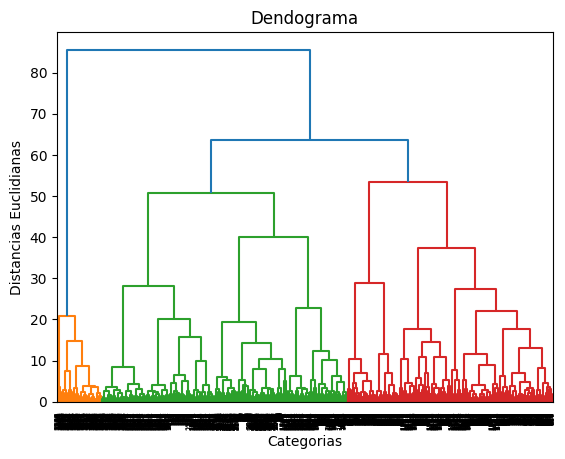

In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
""" Clustering Jerárquico """

# Creamos el dendograma para encontrar el número óptimo de clusters
dendrogram = sch.dendrogram(sch.linkage(data_std, method = 'ward'))
plt.title('Dendograma')
plt.xlabel('Categorias')
plt.ylabel('Distancias Euclidianas')
plt.show()

## Seleccionando número de clusters
### Criterios
Viendo el dendograma, tenemos que decidir la cantidad de clústers. Por lo que se observa, hay una rama con menor cantidad de datos.

Tomar como criterio de corte un valor máximo para la medida de similaridad no sería lo adecuado ya que podriamos contar con clases desbalanceadas respecto a la cantidad de datos.

Por esto, se decide tomar como criterio de corte la mayor profundidad del árbol.

También podría ser factible tomar el número máximo de instancias que deberán tener las particiones, sin embargo esta opción es dificil de aplicar, por lo que nos quedamos con la segunda.


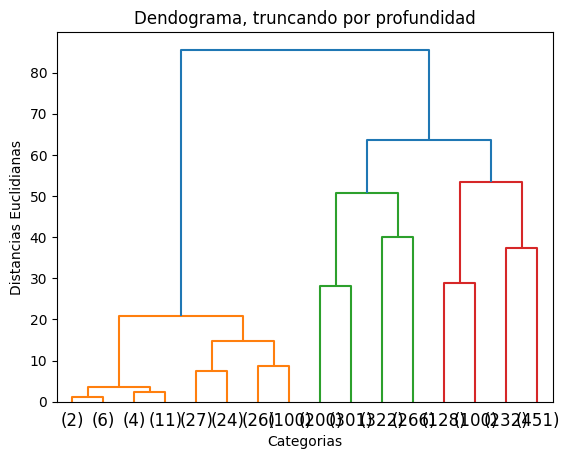

In [40]:
dendrogram = sch.dendrogram(sch.linkage(data_std, method='ward'), truncate_mode='level', p=3)
plt.title('Dendograma, truncando por profundidad')
plt.xlabel('Categorias')
plt.ylabel('Distancias Euclidianas')
plt.show()

Observando el dendograma, resulta razonable elegir un número de clusters de 16.

También, si hubiesemos tomado un nivel menos de profundidad podríamos elegir un número de clusters de 8.

Realizemos ahora el clustering aglomerativo especificando número de clústers.

In [41]:
# Ajustando Clustering Jerárquico al conjunto de datos
clustering = AgglomerativeClustering(n_clusters = 16, metric= 'euclidean', linkage = 'ward')

cluster_assignments = clustering.fit_predict(data_std)

#y_hc es un array con el grupo al cual le corresponde cada valor

data['Cluster (aglomerativo)'] = cluster_assignments
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans,Cluster (aglomerativo)
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3,14
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,11,14
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3,14
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,11,14
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,11,14


Utilizamos el coeficiente de Silhouette para evaluar el clustering.

Comparamos los coeficientes del agrupamiento aglomerativo con el coeficiente del agrupamiento k-means.

In [42]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg_agl = silhouette_score(data_std, cluster_assignments)
silhouette_avg_kmeans = silhouette_score(data_std, data['Cluster KMeans'])

print(silhouette_avg_agl)
print(silhouette_avg_kmeans)

0.3302697750453461
0.3340208865391371


## Conclusión
Como podemos observar, el método de clustering aglomerativo ha sido igual de inefectivo que k-means.

Las razones de esto pueden ser las mismas que para las de k-means: muchas clases distintas que no están bien separadas. Sin importar la cantidad de clústers que se elijan, la evaluación Silhouette no mejora.

Podemos decir que este algoritmo no genera buenos resultados para este dataset.

## Buscar número óptimo de clusters usando GAP
Aún así, podemos tratar de determinar el número óptimo de clústers usando GAP, sin embargo esto no mejora mucho los resultados.

In [43]:
""" Clustering Jerárquico """
gs_obj = OptimalK(n_jobs=1, n_iter=20)
n_clusters = gs_obj(data_std.astype('float'), n_refs=60,
cluster_array=np.arange(2, 10))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  9


# Conclusiones finales
Hemos analizado nuestro dataset, en busca de analizar cómo estaban distribuídos los datos a pesar de la alta dimensionalidad. Hemos enfrentado dicho problema intentando primero usar técnicas de reducción de dimensionalidades como PCA. De esta hemos obtenido algunos resultados que no fueron del todo satisfactorios, pero conseguimos al menos tener una primera visualización.

Luego usando métodos no lineales, tratamos de desdoblar un hipotético hiperplano, usando ISOMAP, de donde pudimos ver que no hay un hiperplano muy claro en las altas dimensiones.

Además probamos con T-SNE, donde sí pudimos ver una separación clara en el nuevo espacio creado, tanto en 2 como en 3 dimensiones.

## Clústering
En la parte de algorítmos de clústering, no hemos podido obtener buenos resultados de estos, debido tal vez a la insuficiencia de los métodos usados a capturar la agrupación en un conjunto como este.